# Single-cell Net

## Literature research

### Pure GRN

- __GRN research__

  - Two approaches: 
     - __<font color = blue>forward research</font>__ means knowing the network structure and studying network functions;
     - __<font color = blue>reverse engineering</font>__ includes known stimulus response relationships or input-output relationships,     detecting network structures, etc. 
  - A close look:<br>
    The developed mathematical models of gene regulation networks mainly include directed graphs, Boolean networks, Bayesian network models, differential equation models, stochastic models, and mixed models. 
     - Relatively speaking, __directed graphs__ and __Boolean networks__ are relatively simple models and the simulation of the system is qualitative and rough; 
     - __Bayesian network__ is a probabilistic model that can describe the regulation network quantitatively and randomly; 
     - __Differential equation networks__ can quantitatively and accurately predict the behavior of the system, however, as the network scale increases largely, these methods face the problem of parameter estimation and difficulty in calculation;
     - __Stochastic models__ can accurately fit the number of species molecules in the network, but also because of the large amount of calculation, it is often difficult to apply to the actual large network. 
  

- __Zheng et al., Bioinfomatics, 2015__

 - __Core idea__: the regulatory rules $R=\{F, P\}$ consists of a set of Boolean functions $F$ and corresponding probabilities $P$, which collaboratively determines the dynamic behavior of a GRN.
 
 > __Insight__: like Markov Decision Process $<S,A,P,R,\gamma>$, where $S$ is a set of states corresponding to the $S = (s_1, s_2, \cdots, s_m)$ in Zheng's paper, $P$ is a state
 transition probability amd $A$ is a set of actions which might be deemed as a set of boolean functions. In addition, $\gamma \in [0,1]$ is a discount factor which is not taken into consideration in Zheng's paper, for the original paper has no conception of the Bellman equation.
 
  > __Insight__: the original paper introduced the conception of reward aimed at infering the $P$. However, the policy $\pi$ and the value $v_*$ or $v_{\pi}$ are exactly what we desire in reinforcement learning.
 
 - __Model constrcution__ 
   - The assumption is that GRN provides the driving force that pushes cells from acestral states towards descendant states [(Huang and Kauffman, 2012)](https://link.springer.com/referenceworkentry/10.1007%2F978-1-4614-1800-9_35)
 
   - $s =(x_1, x_2, \cdots, x_n) $, where $x_i$ is the expression value of the i-th gene. And "attractors" are stable states.
   __<font color = red>To be continued...</font>__
   
   - Discretize the continuous gene expression
 
 
 - __Evaluation__
   - Precision ($TP/(TP+FP)$)
   - Recall ($TP/(TP+FN)$)
   - F-measure ($Precision \times Recall/(Precision + Recall)$)
   
   
 - __Question__
 
   - Why introduce Boolean network? Or what advantages do Boolean network possess?
   
   - If we simplify Boolean network into undirected graph, how could we know the regulatory?  
 
   - "randomly pick one gene with equal probability and update its state based on its inputs (i.e. regulators)", random choice is fair and makes sense when we have no prior knowledge.
 


- __[Cussat-Blanc et al., Artificial life, 2019](https://www.mitpressjournals.org/doi/full/10.1162/artl_a_00267)__
  - Gene Expression, knocking on the door of cell heterogeneity
     - Not only do individual cells of the same type have differences in their expression profile( While the characterization of cell types is a convenient way of clustering cell behaviors into classes, there is nevertheless substantial variation between different cells even in the same cell class (or type).), but cells vary their expression levels depending on circumstances and age.[Kim et al., Trends in Cell Biology, 2010]()
  
  - GRN Inference
    - Biological Models
    - Dynamics and Analysis
    - __<font color = red>To be continued...</font>__
    
  - Neuromodulation
    - Recent work has begun to make a connection between learning and genetic regulation. In 2013, Harrington, et al. studied a robot navigation problem with a robot controlled by a temporal-difference reinforcement learning agent [(Harrington et al., ECAL, 2017)](https://www.mitpressjournals.org/doi/abs/10.1162/isal_a_034). By introducing a neuromodulatory system governed by a GRN to control the agent's learning and memory, the robot was able to outperform traditional reinforcement learning. 

### GRN combined with RL

- __why we introduce RL?__  <br>
The goal of controlling a gene regulatory network (GRN) is to generate an intervention strategy, i.e., a control policy, such that by applying the policy the system (the cell) will __avoid undesirable states__. (That is, we apply a series of actions to some pre-selected set of genes, and expect the regulation system not to fall into undesirable states.) <br>
_Drive a cell from its current state t some other more desirable state by influencing tis dynamics._
>__the undesirable condition__(e.g., identity of genes associated with tumor growth)<br>
 __the cost of intervention__ (e.g., the severity of side effects and amount of financial cost)
- __Do we need to know the GRN in advance?__  <br>
YES


- __An stunning <font color = blue>dataset</font>: Melanoma__  <br>
   - Presented in __*Bittner et al., Nature, 2000.*__
   - It is composed of 8067 genes and 31 samples.
   - It is reported that the __WNT5A gene__ is highly discriminating factor for metastasizing of melanoma, and deactivating the WNT5A significantly reduces the metastatic effect of WNT5A.
   - __<font color = blue>Goal:</font>__ control strategy for keeping the WNT5A deactivated may mitigate the metastasis of melanoma
   

- __Sirin et al., IJCA, 2013.__ 

  - Core idea: The authors proposed a method based on Batch Mode Reinforcement Learning that can directly use the available gene expression data to obtain an approximated control policy for gene regulation that avoids the time consuming model building phase.
  - __Research time lines:__
     - They  model gene regulation as a Probabilistic Boolean Network (PBN) and attempt to identify the best intervention strategy over the constructed PBN ___*[Shmulevich et al., 2002]*___.
     - The study described in ___*[Datta et al., 2003]*___ tries to find an optimal finite horizon intervention strategy for PBNs so that at the ultimate horizon, the system achieves the highest probability of being in a desirable state.
     - The study in ___*[Pal et al., 2006]*___ finds optimal infinite horizon intervention strategy by formulating the control problem as a Markov Decision Process (MDP) and then solving the problem with the help of the Value Itera- tion algorithm. 
     - The study in ___*[Faryabi et al., 2007a; 2007b]*___ applies Reinforcement Learning (RL) techniques to obtain an approximate control policy of the constructed PBN.
     - ......  
     
   __<font color = blue>Disadvantages above all:</font>__
    <mark><mark> 
    the basic and most important problem with these solutions for controlling GRNs is that __none of them can solve the control problem for systems with more than several tens of genes__ due to their exponential time and space requirements.
    
  - __Model__<br>
  Converted gene expression data into a series of experience tuples each of which is a 4-tuple $(s, a, s', c)$, where $s$ is the __current state__, $a$ is the __current action__,$s'$ is the __next state__ and $c$ is the __immediate cost__(note that instead of associating reward values for the desirable states, in their method they have associated cost values for undesirable states).
     - States: the state of a GRN is defined by the discretized form of the gene expression sample.(note that there are $2^n$ possible states where $n$ is the number of genes in the regulation system.)
     - Actions: the action semantics for a gene regulation system is mostly implemented through reversing the value of a specific gene or a set of genes, i.e., changing its value from 0 to 1 or 1 to 0. __Those reversed genes are named as input genes and should be specified in the context of the control problem.__
     - Costs: $$cost(s,a)=
     \begin{cases}
　　　　0 + n \times c,  & if\quad goal(s) \\
　　　　\alpha + n \times c, &  else
　　　　\end{cases}$$
    where $\alpha$ is the penalty of being in an undesirable state, $n$ is the number of input genes whose action value is 1, and $c$ is the cost of action to apply for each input gene.

  - __Evaluation__<br>
  The steady-state probability distributions are shifted from undesirable states to the desirable states.

<img src="./fig/steady_state_pro_distribution.png" width="40%" />

- __Papagiannis & Moschoyiannis, arXiv, 2019.__ 

- __Imani & Braga-Neto, IEEE Transactions on Control of gene regulatory, 2019.__ 
  - Goal: Control of gene regulatory networks (GRNs) to shift gene expression from undesirable states to desirable ones.

- __Wang et al., JVC (Journal of Vibration and Control), 2020.__ 

  - __Research time lines:__
   - __*Sirin et al*__. applied the model-free batch RL __Least-Squares Fitted Q Iteration (FQI) method__ to obtain a controller from data without explicitly modeling the GRN. 
   - ___*Imani & Braga-Neto*___. used RL with Gaussian processes to achieve near-optimal infinite-horizon control of GRNs with uncertainty in both the interventions and measurements . 
   - ___*Papagiannis & Moschoyiannis*___ introduced a novel learning approach to GRN control using __Double Deep Q Network (Double DQN)__ with __Prioritized Experience Replay (PER)__ and demonstrated successful results for larger GRNs than previous approaches.
   
   __<font color = blue>Disadvantages above all:</font>__
    <mark><mark> 
    They are limited to Random Boolean Networks (RBN), which have discrete state and action spaces.
    


### Vanilla GRN_RL


- __Model__

   - __States__: $S$ is a finite set of states, where $S_t \in \{0,1\}^d$ represents the activation/inactivation state of the genes at time $t$ with $1 \times d$ dimension. 
   - __Actions__: $A$ can affect the state of genes which has the same input form as state $S$.
   - __value function__: in reinforcement learning we use
   $$v_{\pi}(s)=E_{\pi}[G_t|S_t=s]=E[R_{t+1}+\gamma v_{\pi}(S_{t+1})|S_{t+1}=s]$$
   where $G_t = R_{t+1}+\gamma R_{t+2}+\cdots=R_{t+1}+\gamma G_{t+1}$
       $$q_{\pi}(s,a)=E_{\pi}[R_{t+1}+\gamma q_{\pi}(S_{t+1},A_{t+1})|S_{t+1}=s,A_{t+1}=a]$$
   Here we may follow control problem setting that using __immediate cost__ $C_t(s,a)$ to replace $R_{t}$
   The primary goal is to maxiumize $q_{\pi}$, however, we introduce the __immediate cost__, which let our goal converts into miniumize $q_{\pi}$ to get the optimal q-function
   $$q_*(s,a)=\min_{\pi \in \Pi}q_{\pi}(s,a)$$
   where $\Pi$ is the set of all possible policies. The optimal policy is as following:
   $$\pi_*(a)=\arg \min_{a \in A}q_*(s,a)$$
   where $A$ is the set of all action spaces.
   > __Insight__: how to define the __immediate cost__?<br>
     Still exploring...
     
   > __Insight__: how do we know that value iteration converges to $v_{*}$? or that iterative policy evauation converges to $v_{\pi}$?<br>
   All can be solved by __* Contraction Mapping Theorem *__.
   - __How to connect state $S$ and action $A$?__
   By introducing the non-linear Markov signal model
   $$S_t=f(S_{t-1})\oplus a_{t-1}\oplus n_t$$
   where $n_k\in \{0,1\}^d$ is Boolean transition noise and $\oplus$ is __XOR__. Besides, $f(\cdot)$ is a Boolean function.
   
   
   - __Challenge:__ interaction between input data and environment
   
   __<font color = red>To be continued...</font>__

In [3]:
import numpy as np
c = np.arange(10)[::-1]
print(c)

[9 8 7 6 5 4 3 2 1 0]


In [15]:
POP_SIZE = 100
DNA_SIZE = 10
X_BOUND = [0, 5]
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   # initialize the pop DNA
translateDNA = pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]
print(translateDNA)
pop.shape


[1.82795699e+00 3.24535679e+00 1.02150538e+00 2.58553275e+00
 7.57575758e-01 2.56598240e+00 3.67057674e+00 3.41153470e+00
 1.95503421e-02 2.84946237e+00 1.31964809e+00 4.88758553e-03
 1.99902248e+00 4.98533724e+00 2.63440860e+00 2.81524927e+00
 3.41153470e+00 4.88758553e-03 4.95112414e+00 3.33333333e+00
 2.42913001e+00 2.00391007e-01 2.56598240e+00 2.41446725e+00
 4.74095797e+00 1.95503421e+00 6.64711632e-01 1.39296188e+00
 1.18279570e+00 4.74095797e+00 4.09090909e+00 1.02639296e-01
 1.05571848e+00 2.61485826e+00 1.64711632e+00 3.64125122e+00
 1.59824047e+00 1.82795699e+00 2.29716520e+00 4.98533724e+00
 4.23264907e+00 1.88172043e+00 9.28641251e-01 4.08113392e+00
 4.07135875e+00 4.32062561e+00 5.08308895e-01 1.73020528e+00
 1.64222874e+00 1.27565982e+00 2.61974585e+00 2.93255132e-01
 1.85728250e-01 2.55620723e+00 3.56793744e+00 1.85728250e+00
 2.05278592e+00 4.68719453e+00 1.34897361e+00 2.22873900e+00
 9.97067449e-01 3.40664712e+00 3.69501466e+00 2.83479961e-01
 1.09481916e+00 8.406647

(100, 10)

In [12]:
x = np.linspace(*X_BOUND, 200)
x

array([0.        , 0.02512563, 0.05025126, 0.07537688, 0.10050251,
       0.12562814, 0.15075377, 0.1758794 , 0.20100503, 0.22613065,
       0.25125628, 0.27638191, 0.30150754, 0.32663317, 0.35175879,
       0.37688442, 0.40201005, 0.42713568, 0.45226131, 0.47738693,
       0.50251256, 0.52763819, 0.55276382, 0.57788945, 0.60301508,
       0.6281407 , 0.65326633, 0.67839196, 0.70351759, 0.72864322,
       0.75376884, 0.77889447, 0.8040201 , 0.82914573, 0.85427136,
       0.87939698, 0.90452261, 0.92964824, 0.95477387, 0.9798995 ,
       1.00502513, 1.03015075, 1.05527638, 1.08040201, 1.10552764,
       1.13065327, 1.15577889, 1.18090452, 1.20603015, 1.23115578,
       1.25628141, 1.28140704, 1.30653266, 1.33165829, 1.35678392,
       1.38190955, 1.40703518, 1.4321608 , 1.45728643, 1.48241206,
       1.50753769, 1.53266332, 1.55778894, 1.58291457, 1.6080402 ,
       1.63316583, 1.65829146, 1.68341709, 1.70854271, 1.73366834,
       1.75879397, 1.7839196 , 1.80904523, 1.83417085, 1.85929

In [37]:
import numpy as np
Q = np.array([[0, 0, 1/2, 1/2], [1/4, 1/4, 1/4, 1/4], 
              [1/4, 0, 1/4, 1/2], [1/4, 0, 1/4, 1/2]])
init_s = np.array([[0, 1, 0, 0]])
eps = 1
while eps > 1e-6:
    next_s = np.dot(init_s, Q)
    eps = np.sqrt(np.sum(np.square(next_s - init_s)))
    init_s = next_s
print(init_s)

[[1.99999988e-01 5.96046448e-08 3.00000012e-01 4.99999940e-01]]


In [13]:
import numpy as np

def beta_s(w,a,b):
    # Beta Function
    return w**(a-1)*(1-w)**(b-1)


def random_coin(p):
    # returns True if the coin with probability P of heads 
    # comes heads when flipped.
    unif = np.random.uniform(0,1)
    if unif >= p:
        return False
    else:
        return True


def beta_mcmc(N_hops,a,b):
    # runs the MCMC chain for Beta Distribution.
    states = []
    cur = np.random.uniform(0,1)
    for i in range(N_hops):
        states.append(cur)
        next = np.random.uniform(0,1)
        ap = min(beta_s(next,a,b)/beta_s(cur,a,b),1) # Calculate the acceptance probability
        if random_coin(ap):
            cur = next
    return states[-1000:] # Returns the last 100 states of the chain

/home/eric/anaconda3/envs/TF/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/home/eric/anaconda3/envs/TF/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/home/eric/anaconda3/envs/TF/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


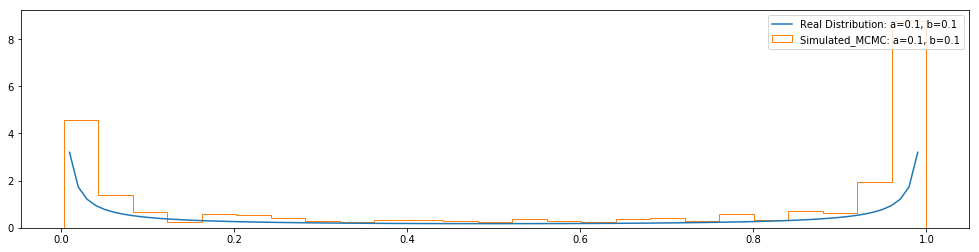

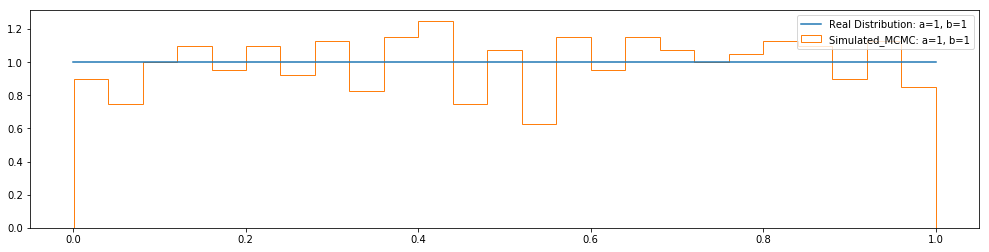

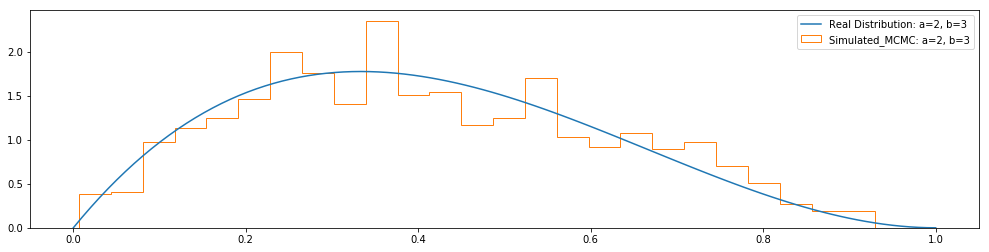

In [23]:
#import pylab as pl
import matplotlib.pyplot as plt
import scipy.special as ss
%matplotlib inline
plt.rcParams['figure.figsize'] = (17.0, 4.0)

# Actual Beta PDF.
def beta(a, b, i):
    e1 = ss.gamma(a + b)
    e2 = ss.gamma(a)
    e3 = ss.gamma(b)
    e4 = i ** (a - 1)
    e5 = (1 - i) ** (b - 1)
    return (e1/(e2*e3)) * e4 * e5

# Create a function to plot Actual Beta PDF with the Beta Sampled from MCMC Chain.
def plot_beta(a, b):
    Ly = []
    Lx = []
    # i_list = np.mgrid[0:1:100j]
    i_list = np.linspace(0, 1, 100)
    for i in i_list:
        Lx.append(i)
        Ly.append(beta(a, b, i))
    plt.plot(Lx, Ly, label="Real Distribution: a="+str(a)+", b="+str(b))
    plt.hist(beta_mcmc(100000,a,b),  normed=True, bins=25, histtype='step',label="Simulated_MCMC: a="+str(a)+", b="+str(b))
    plt.legend()
    # plt.show()
plt.figure()    
plot_beta(0.1, 0.1)
plt.figure()
plot_beta(1, 1)
plt.figure()
plot_beta(2, 3)

In [17]:
"""
This is a vanilla model for GRN controlling which is based on
Q-learning, that is to say it can only handle small space state
problem.
Here I would take n=3 for example.
the
"""

import numpy as np
import pandas as pd
import time

np.random.seed(2)  # reproducible


N_STATES = 6   # the length of the 1 dimensional world
ACTIONS = ['left', 'right']     # available actions
EPSILON = 0.9   # greedy police
ALPHA = 0.1     # learning rate
GAMMA = 0.9    # discount factor
MAX_EPISODES = 13   # maximum episodes
FRESH_TIME = 0.3    # fresh time for one move


def build_q_table(n_states, actions):
    table = pd.DataFrame(
        np.zeros((n_states, len(actions))),     # q_table initial values
        columns=actions,    # actions's name
    )
    # print(table)    # show table
    return table


def choose_action(state, q_table):
    # This is how to choose an action
    state_actions = q_table.iloc[state, :]
    if (np.random.uniform() > EPSILON) or ((state_actions == 0).all()):  # act non-greedy or state-action have no value
        action_name = np.random.choice(ACTIONS)
    else:   # act greedy
        # action_name = state_actions.argmax()
        action_name = state_actions.idxmax()
        #  replace argmax to idxmax as argmax means
        #  a different function in newer version of pandas
    return action_name


def get_env_feedback(S, A):
    # This is how agent will interact with the environment
    if A == 'right':    # move right
        if S == N_STATES - 2:   # terminate
            S_ = 'terminal'
            R = 1
        else:
            S_ = S + 1
            R = 0
    else:   # move left
        R = 0
        if S == 0:
            S_ = S  # reach the wall
        else:
            S_ = S - 1
    return S_, R


def update_env(S, episode, step_counter):
    # This is how environment be updated
    env_list = ['-']*(N_STATES-1) + ['T']   # '---------T' our environment
    if S == 'terminal':
        interaction = 'Episode %s: total_steps = %s' % (episode+1, step_counter)
        print('\r{}'.format(interaction), end='')
        time.sleep(2)
        print('\r                                ', end='')
    else:
        env_list[S] = 'o'
        interaction = ''.join(env_list)
        print('\r{}'.format(interaction), end='')
        time.sleep(FRESH_TIME)


def rl():
    # main part of RL loop
    q_table = build_q_table(N_STATES, ACTIONS)
    for episode in range(MAX_EPISODES):
        step_counter = 0
        S = 0
        is_terminated = False
        update_env(S, episode, step_counter)
        while not is_terminated:

            A = choose_action(S, q_table)
            S_, R = get_env_feedback(S, A)  # take action & get next state and reward
            q_predict = q_table.loc[S, A]
            if S_ != 'terminal':
                q_target = R + GAMMA * q_table.iloc[S_, :].max()  # next state is not terminal
            else:
                q_target = R     # next state is terminal
                is_terminated = True    # terminate this episode

            q_table.loc[S, A] += ALPHA * (q_target - q_predict)  # update
            S = S_  # move to next state
            print(S)
            update_env(S, episode, step_counter+1)
            step_counter += 1
    return q_table


if __name__ == "__main__":
    q_table = rl()
    print('\r\nQ-table:\n')
    print(q_table)


o----T1
-o---T2
--o--T1
-o---T2
--o--T3
---o-T4
----oT3
---o-T4
----oT3
---o-T4
----oT3
---o-T2
--o--T3
---o-T2
--o--T3
---o-T2
--o--T1
-o---T0
o----T1
-o---T2
--o--T1
-o---T2
--o--T1
-o---T0
o----T1
-o---T2
--o--T1
-o---T0
o----T0
o----T0
o----T0
o----T1
-o---T0
o----T1
-o---T2
--o--T3
---o-T4
----oTterminal
o----T                          0
o----T1
-o---T0
o----T1
-o---T0
o----T1
-o---T2
--o--T1
-o---T2
--o--T1
-o---T2
--o--T3
---o-T2
--o--T1
-o---T2
--o--T1
-o---T0
o----T1
-o---T2
--o--T3
---o-T4
----oTterminal
o----T                          1
-o---T0
o----T1
-o---T0
o----T1
-o---T2
--o--T3
---o-T4
----oTterminal
o----T                          1
-o---T2
--o--T3
---o-T4
----oTterminal
o----T                          1
-o---T2
--o--T1
-o---T2
--o--T3
---o-T4
----oTterminal
o----T                          1
-o---T2
--o--T3
---o-T4
----oTterminal
o----T                          1
-o---T2
--o--T3
---o-T4
----oTterminal
o----T                          1
-o---T2
--o--T3
---o-T4
----oTter

In [103]:
c = q_table['right'].cumsum()
c

0    0.004320
1    0.029325
2    0.140566
3    0.509316
4    1.255129
5    1.255129
Name: right, dtype: float64

In [34]:
from bitarray import bitarray
a = bitarray()
a.append(True)
a.extend([False, False])
a_list = list(a)
a_list
a_list_int = str(a_list)
a_list_int

'[True, False, False]'

In [45]:
b = [False, True, False]
type(b)


list

In [38]:
array = np.array([True, False])
print(list(array+0))
array.astype(int)
print(array)

[1, 0]
[ True False]


In [98]:
a = np.random.randint(0, 6)
aa = "{:03b}".format(42)
print(a)
print(aa)
type(aa)

5
101010


str

In [99]:
v = '100010'
if v == aa:
    print('yes')
else:
    print('no')
print(v)
type(v)
v = v[:2] + '1' + v[3:]
print(v)


no
100010
101010


In [97]:
v_int = int(v, 2)
print(v_int)

42


In [88]:
v_list = list(v)
v_list[1] = '1'
print(v_list)
print(str(v_list))

['1', '1', '0', '0', '1', '0']
['1', '1', '0', '0', '1', '0']


In [76]:
N_GENES = 3
a_idx = np.random.randint(0, N_GENES)
a_idx

0

In [82]:
ATTRACTORS = '001'
if aa == ATTRACTORS:
    print('yes')
else:
    print('no')

yes


In [92]:
string = 'abcdafg'
newstr = string[:4] + 'e' + string[5:]
print(string)
print(newstr)
type(newstr)

abcdafg
abcdefg


str